# 4.1 - Data Cleaning 2


![cleaning2](images/data_cleaning_cycle.avif)

# Ejemplo 1 - Airbnb data


En esta limpieza nos centraremos en tres conceptos:

+ Valores nulos.
+ Datos inconsistentes 
+ Valores atípicos (Outliers)

Primero importamos librerias y los datos.

In [1]:
%pip install ipython
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# librerias

import pandas as pd
pd.set_option('display.max_columns', None)


import numpy as np

import warnings
warnings.filterwarnings('ignore')

# pa pintar
import pylab as plt  # import matplotlib.pyplot as plt
import seaborn as sns

# para que salga el grafica
%matplotlib inline

In [3]:
# se cargan los datos

airbnb_ori = pd.read_csv('../data/AB_NYC_2019.csv')

airbnb =  airbnb_ori.copy()

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**Exploración Inicial**

Se comienza la exploracion de los datos.

In [4]:
airbnb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# del punto pa la izq damelo todo(:), del punto pa la dcha solo 2 decimales


airbnb.describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
id,48895.00,19017143.24,10983108.39,2539.00,9471945.00,19677284.00,29152178.50,36487245.00
host_id,48895.00,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,107434423.00,274321313.00
latitude,48895.00,40.73,0.05,40.50,40.69,40.72,40.76,40.91
longitude,48895.00,-73.95,0.05,-74.24,-73.98,-73.96,-73.94,-73.71
price,48895.00,152.72,240.15,0.00,69.00,106.00,175.00,10000.00
minimum_nights,48895.00,7.03,20.51,1.00,1.00,3.00,5.00,1250.00
number_of_reviews,48895.00,23.27,44.55,0.00,1.00,5.00,24.00,629.00
reviews_per_month,38843.00,1.37,1.68,0.01,0.19,0.72,2.02,58.50
calculated_host_listings_count,48895.00,7.14,32.95,1.00,1.00,1.00,2.00,327.00
availability_365,48895.00,112.78,131.62,0.00,0.00,45.00,227.00,365.00


In [6]:
airbnb.describe(include='object').T

,count,unique,top,freq
name,48879,47905,Hillside Hotel,18
host_name,48874,11452,Michael,417
neighbourhood_group,48895,5,Manhattan,21661
neighbourhood,48895,221,Williamsburg,3920
room_type,48895,3,Entire home/apt,25409
last_review,38843,1764,2019-06-23,1413


**Columnas numericas**

In [7]:
num_df = airbnb.select_dtypes(exclude='object')

num_df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


In [8]:
airbnb._get_numeric_data().head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


**Columnas categoricas**

In [9]:
cat_df = airbnb.select_dtypes(exclude=['int', 'float'])

cat_df.head()

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19


## Valores Nulos

In [10]:
airbnb.shape

(48895, 16)

In [11]:
nan_cols = airbnb.isna().sum()

nan_cols[nan_cols>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

In [12]:
nan_cols = airbnb.isna().mean() * 100

nan_cols[nan_cols>0]

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

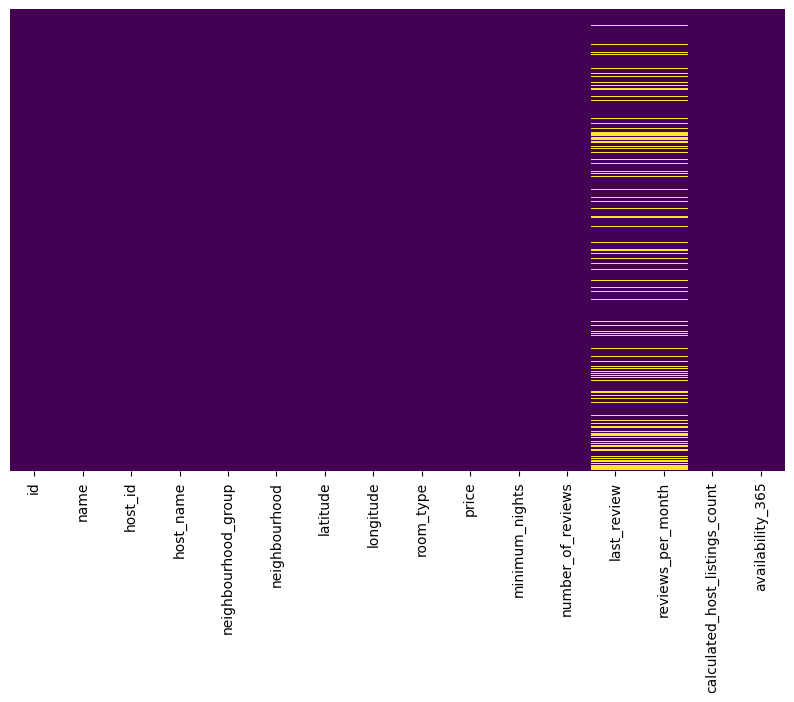

In [13]:
# grafico de nulos en el dataframe

#inicializa la figura
plt.figure(figsize=(10, 6))  # 100X60  pixeles


sns.heatmap(airbnb.isna(),       # datos
            yticklabels=False,  # quita las etiquetas del eje y
            cmap='viridis',      # mapa de color
            cbar=False           # sin barra lateral
           )

plt.show();

In [14]:
def check_nan(df: pd.DataFrame) -> None:
    
    """
    Recibe un dataframe y enseña el % de nulos y lo grafica
    """
    
    nan_cols = df.isna().mean() * 100  # % de valores nulos
    
    nan_cols = nan_cols[nan_cols>0]
    
    display(f'N nan cols: {len(nan_cols)}')
    display(nan_cols)
    
    
    # grafico de nulos en el dataframe

    #inicializa la figura
    plt.figure(figsize=(10, 6))  # 100X60  pixeles


    sns.heatmap(df.isna(),       # datos
                yticklabels=False,  # quita las etiquetas del eje y
                cmap='viridis',      # mapa de color
                cbar=False           # sin barra lateral
               )

    plt.show();

'N nan cols: 4'

name                  0.032723
host_name             0.042949
last_review          20.558339
reviews_per_month    20.558339
dtype: float64

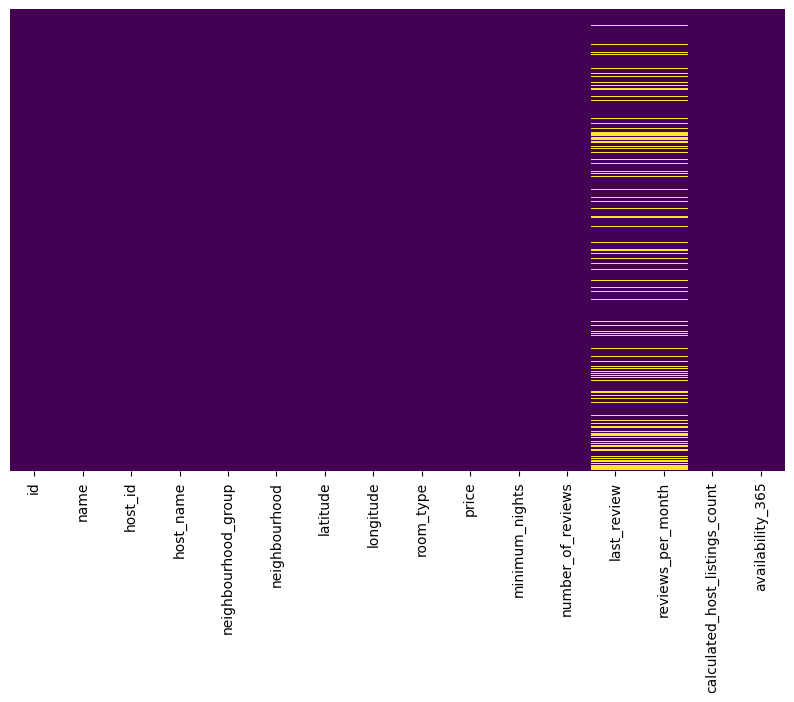

In [15]:
check_nan(airbnb)

**¿Qué hacemos con estos valores?**

In [16]:
# borrar columnas

cols = ['id', 'host_id']

airbnb.drop(columns=cols, inplace=True)

In [17]:
airbnb.duplicated().any()

False

In [18]:
airbnb['price'].min(), airbnb['price'].mean(), airbnb['price'].max()

(0, 152.7206871868289, 10000)

In [19]:
airbnb[airbnb.price==0].shape

(11, 14)

In [20]:
airbnb[airbnb.price==10000]

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83


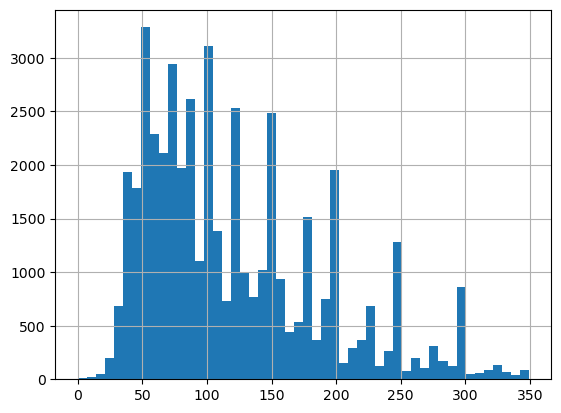

In [21]:
airbnb[airbnb.price<350].price.hist(bins=50);

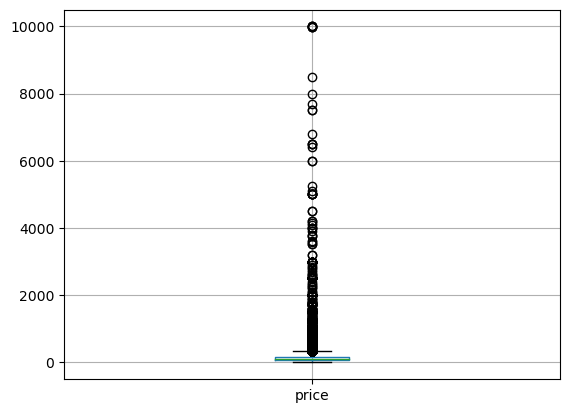

In [22]:
airbnb[['price']].boxplot();

In [23]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
airbnb = airbnb[(airbnb.price>50) & (airbnb.price<350)]

In [25]:
airbnb.shape

(39497, 14)

In [26]:
airbnb_ori.shape

(48895, 16)

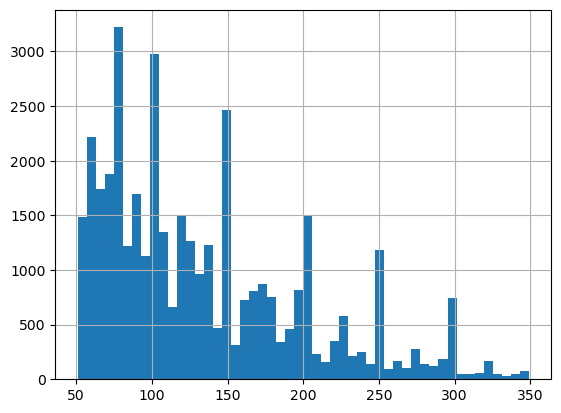

In [27]:
airbnb.price.hist(bins=50);

In [28]:
airbnb.price.describe()

count    39497.000000
mean       133.705167
std         66.036012
min         51.000000
25%         80.000000
50%        119.000000
75%        175.000000
max        349.000000
Name: price, dtype: float64

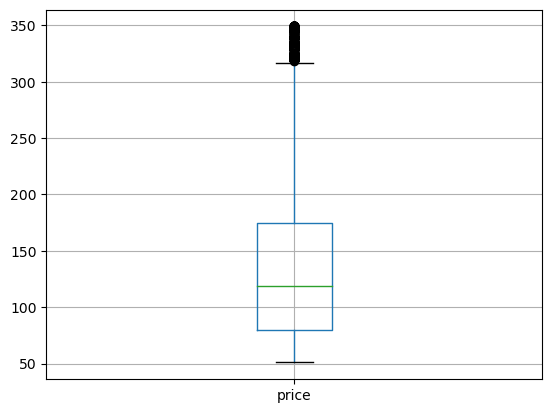

In [29]:
airbnb[['price']].boxplot();

'N nan cols: 4'

name                  0.030382
host_name             0.040509
last_review          19.411601
reviews_per_month    19.411601
dtype: float64

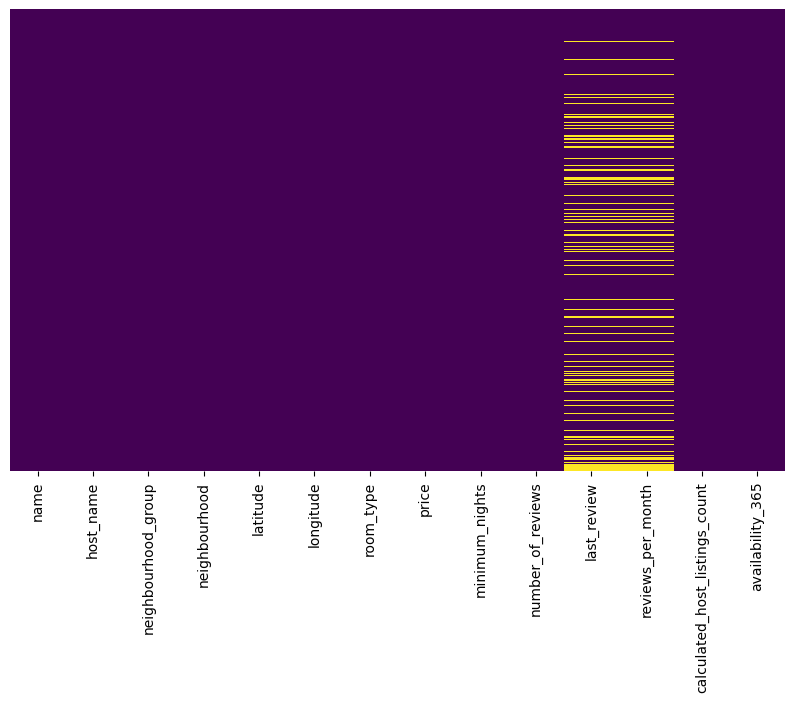

In [30]:
check_nan(airbnb)

In [31]:
# rellenar reviews con 0

airbnb.reviews_per_month.fillna(0., inplace=True)

'N nan cols: 3'

name            0.030382
host_name       0.040509
last_review    19.411601
dtype: float64

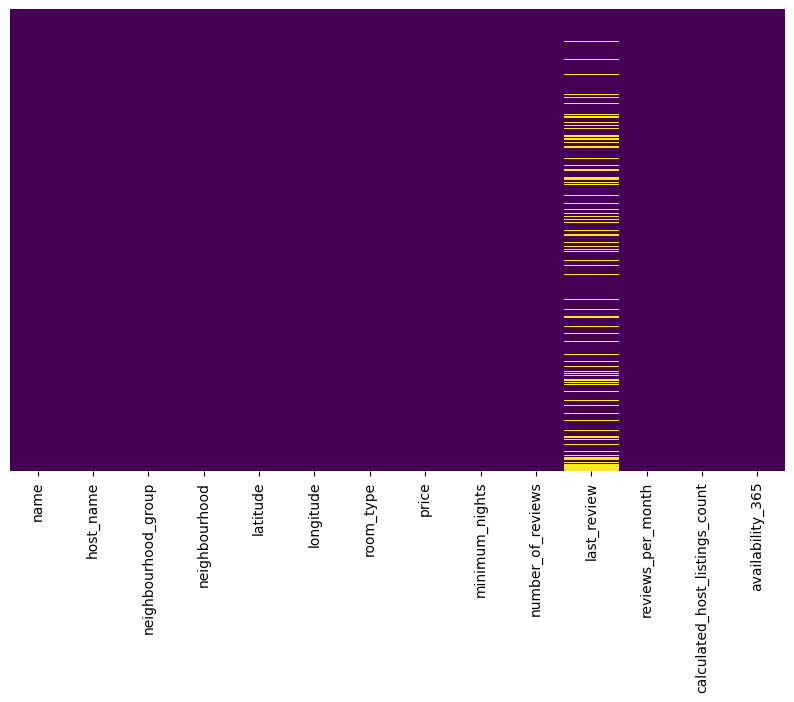

In [32]:
check_nan(airbnb)

In [33]:
# backward/forward fill, normalmente para series temporales
# asumiendo que las fechas están en orden (aqui NO tiene sentido)


airbnb.last_review.bfill()   # con el siguiente

airbnb.last_review.ffill() .head()   # con el anterior

0    2018-10-19
1    2019-05-21
2    2019-05-21
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object

In [34]:
from datetime import datetime

datetime.today()

datetime.datetime(2023, 10, 19, 10, 8, 57, 559799)

In [35]:
#airbnb.drop('last_review', axis=1, inplace=True)

**para categorias, una estragia puede ser rellenar con el valor mas frecuente**

'N nan cols: 3'

name            0.030382
host_name       0.040509
last_review    19.411601
dtype: float64

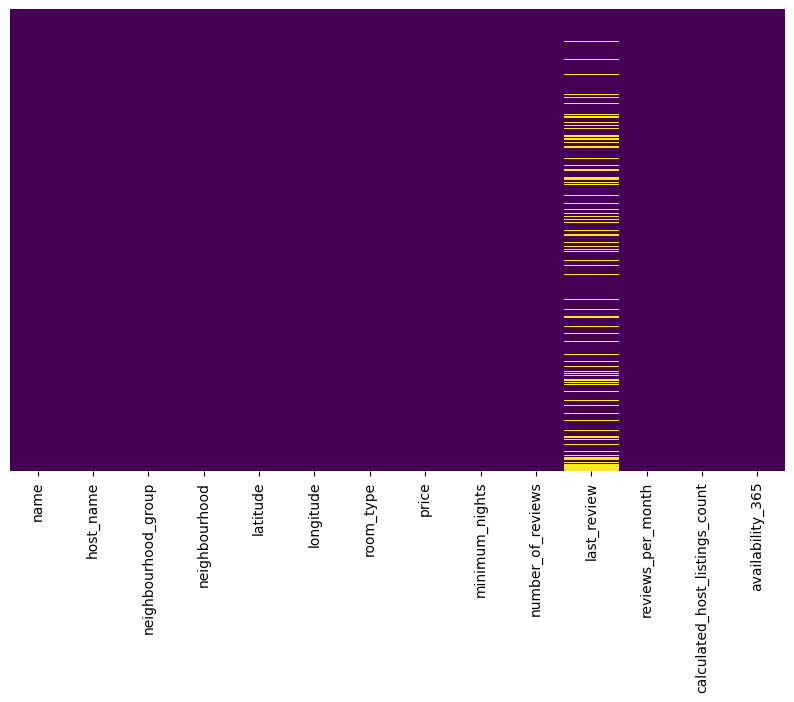

In [36]:
check_nan(airbnb)

## Datos inconsistentes 


**Fechas**

**Arreglando errores en strings**

**ejemplo:** Busqueda de filas que contengan una palabra clave

**Cambio del tipo de dato, optimizacion de memoria**

## Outliers

**depende del contexto**

# Ejemplo 2 - House Data


**Cargamos los datos**

**Analisis inicial**

## Valores Nulos